<a href="https://colab.research.google.com/github/RossanadC/Machine-Learning/blob/main/pytorch_gradient_computation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importiamo le librerie

---


pip-->comando che installa il nuovo pacchetto


In [1]:
# numpy and pytorch are already installed
import numpy as np
import torch
# for computational graph visualization
!pip install torchviz

Definiamo dei tensori che hanno delle caratteristiche diverse, per cui richiediamo di calcolare i gradienti. Pytorch sa che questi devono essere inseriti in un grafo di comuptazione e deve abilitare il calcolo dei gradienti.
x e y input per il caloclo della loss
w i pesi


In [2]:
# variables requiring gradient computation (requires_grad=True)
x = torch.tensor([2.0], requires_grad=True)
y = torch.tensor([1.0], requires_grad=True)
w = torch.tensor([-0.5], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)

# output --> l'output in questo caso è la rete
z = 1/(1 + torch.exp(-(w*x+b)))
print(z)#ci troviamo un tensore

# loss function--> qui l'abbiamo definita a mano ma pytrorch ha funzioni già predifinite che ci evita di farlo a mano ogni volta
l = -y* torch.log(z) - (1-y) * torch.log(1-z)



tensor([0.2689], grad_fn=<MulBackward0>)


In [3]:
l

tensor([1.3133], grad_fn=<SubBackward0>)

Visulizzazione del campo di compiutazione inversa
moltiplicazione addizione negazione esposizione backward
tutte le op elementari che pytorch usa invertite per potrer calcolare i gradienti

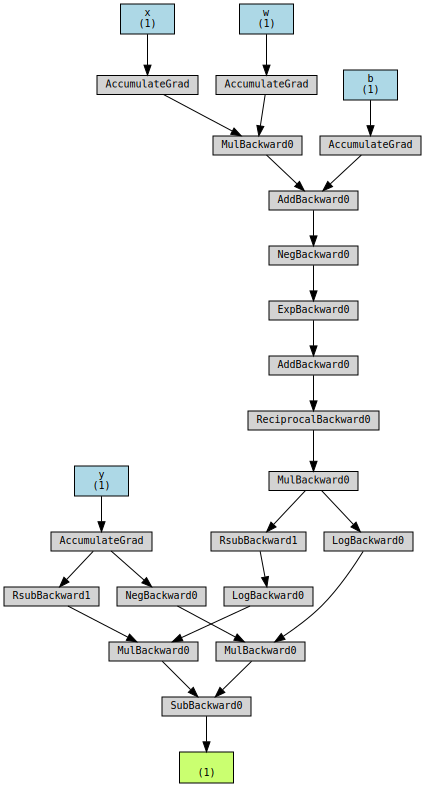

In [4]:
from torchviz import make_dot, make_dot_from_trace
make_dot(l, params={'x':x, 'w':w, 'b':b, 'y':y})

quando effettuiamo il backward pass vengono calcolati i gradienti di l ripsetto a tutti gli elementi collegati ad l

In [5]:
#backward pass
l.backward()

strumento di debug per vedere se il gradiente è diverso da zero per esempio

In [6]:
print("Backward")
print(f'dL/dx = {x.grad}')
print(f'dL/db = {w.grad}')
print(f'dL/dw = {b.grad}')

Backward
dL/dx = tensor([0.3655])
dL/db = tensor([-1.4621])
dL/dw = tensor([-0.7311])
